In [33]:
import pandas as pd
import json

In [34]:
with open('/home/sd3528/hetav-2/top_100_pred_map_all.json') as f:
    data = json.load(f)

In [35]:
df_majority = pd.read_csv('/home/sd3528/hetav-2/data/top_100_majority_human_annotate_corrected.csv')

In [36]:
majority_texts = df_majority['text'].tolist()

In [37]:
bins = {}

In [38]:
for i in range(0, 7):
    for j in range(0, 7):
        if i == j:
            continue
        bins[(i, j)] = []

In [39]:
len(bins.keys())

42

In [40]:
for i in data.keys():
  data_preds = data[i]
  
  for d in data_preds:
    if d['text'] in majority_texts:
      continue
    bins[(int(i), d['second_best_label'])].append({
      'text': d['text'],
      'difference': d['prob'] - d['second_best_prob']
    })

In [42]:
for k in bins.keys():
    print(k, len(bins[k]))

(0, 1) 175
(0, 2) 572
(0, 3) 106
(0, 4) 3551
(0, 5) 566
(0, 6) 99
(1, 0) 81
(1, 2) 31
(1, 3) 19
(1, 4) 231
(1, 5) 91
(1, 6) 26
(2, 0) 606
(2, 1) 311
(2, 3) 134
(2, 4) 3204
(2, 5) 1028
(2, 6) 122
(3, 0) 135
(3, 1) 7
(3, 2) 135
(3, 4) 464
(3, 5) 239
(3, 6) 56
(4, 0) 7164
(4, 1) 980
(4, 2) 3752
(4, 3) 692
(4, 5) 10829
(4, 6) 1740
(5, 0) 2236
(5, 1) 1125
(5, 2) 2418
(5, 3) 1837
(5, 4) 25673
(5, 6) 9396
(6, 0) 71
(6, 1) 66
(6, 2) 127
(6, 3) 47
(6, 4) 1034
(6, 5) 1349


In [43]:
for k in bins.keys():
  # sort the list by the difference
  bins[k] = sorted(bins[k], key=lambda x: x['difference'], reverse=True)

In [46]:
to_label = []
import uuid
for k in bins.keys():
  top_20 = bins[k][:20]
  for i in top_20:
    to_label.append({
      'id': str(uuid.uuid4()),
      'text': i['text'],
      'human_label': None,
    })

In [47]:
len(to_label)

826

In [48]:
# shuffle the list
import random
random.shuffle(to_label)


In [49]:
df_margin = pd.DataFrame(to_label)

In [50]:
df_margin

,id,text,human_label
0,7bdabb73-54e7-43e0-b253-b1007f1735c5,"For your knowledge spreading talent, and of ex...",None
1,a62508d3-1ed7-40ff-b250-50a07a726c57,Law is only for common people not for rich people,None
2,b424ecb8-ba4a-4c48-8e37-5f2fa74e59be,This case shocks India,None
3,4f418a80-acb5-4a50-bfc8-77e5c0c63ed0,Walking on road at 2 AM is inviting Yamraj.Use...,None
4,f8949a05-5325-4bd4-893f-671e4ef0ba44,"18 years, too much!!! Maximum age should be no...",None
...,...,...,...
821,1bcffd11-8bf6-4455-a4e2-180ed3fd8aef,"Justice for anish,aswani :crying_face::crying_...",None
822,ad2fe3be-da3e-492c-8742-17713d9ab792,Jarman cokros,None
823,ce890ecc-db89-42e3-9e90-1afe915abf17,How about salman khan case in your era.. and a...,None
824,74e98fe6-0f79-4b28-bfbb-160fb5cfdda0,Want justice :confounded_face::exploding_head:,None


In [51]:
df_margin.to_csv('/home/sd3528/hetav-2/data/top_20_margin_sample.csv', index=False)

# check similairity

# check human and llm

In [ ]:
import json
with open('/home/sd3528/hetav-2/top_100_pred_map_all_margin.json') as f:
    data = json.load(f)

In [49]:
import pandas as pd

df_margin_anisha = pd.read_csv('/home/sd3528/hetav-2/data/top_20_margin_sample_Anisha.csv')
df_margin_hetav = pd.read_csv('/home/sd3528/hetav-2/data/top_20_margin_sample_hetav.csv')

In [50]:
margin_map_anisha = {}
for i in df_margin_anisha.to_dict(orient='records'):
    margin_map_anisha[i['text']] = i
margin_map_hetav = {}
for i in df_margin_hetav.to_dict(orient='records'):
    margin_map_hetav[i['text']] = i

In [51]:
margin_map_anisha

{'For your knowledge spreading talent, and of explanation skills of any topic in an incredible way, I appreciate your work.\n\nJust, keep it up....:red_heart:': {'id': '7bdabb73-54e7-43e0-b253-b1007f1735c5',
  'text': 'For your knowledge spreading talent, and of explanation skills of any topic in an incredible way, I appreciate your work.\n\nJust, keep it up....:red_heart:',
  'human_label': 6},
 'Law is only for common people not for rich people': {'id': 'a62508d3-1ed7-40ff-b250-50a07a726c57',
  'text': 'Law is only for common people not for rich people',
  'human_label': 3},
 'This case shocks India': {'id': 'b424ecb8-ba4a-4c48-8e37-5f2fa74e59be',
  'text': 'This case shocks India',
  'human_label': 5},
 'Walking on road at 2 AM is inviting Yamraj.Use common sense.God loves innocent,so they have shorter life.Let her bless the person who drove Porsche.': {'id': '4f418a80-acb5-4a50-bfc8-77e5c0c63ed0',
  'text': 'Walking on road at 2 AM is inviting Yamraj.Use common sense.God loves inno

In [63]:
data_from_inf = []
for _l in data.keys():
  for comm in data[_l]:
    if comm['text'] in margin_map_anisha and comm['text'] in margin_map_hetav:            
      data_from_inf.append({
        'text': comm['text'],
        'label': comm['label'],
        'prob': comm['prob'],
        'second_best_label': comm['second_best_label'],
        'second_best_prob': comm['second_best_prob'],
        'human_label_anisha': margin_map_anisha[comm['text']]['human_label'] - 1,
        'human_label_hetav': margin_map_hetav[comm['text']]['human_label'] - 1,
      })

In [64]:
df_margin_combined = pd.DataFrame(data_from_inf)

In [65]:
df_margin_combined

,text,label,prob,second_best_label,second_best_prob,human_label_anisha,human_label_hetav
0,Justice delayed is justice denied..these cases...,0,0.999750,3,1.150019e-04,4,4
1,Indian judiciary :hot_beverage:,0,0.999997,4,2.594005e-06,0,0
2,Indian judiciary is a joke. Corruption is ever...,0,0.999991,4,3.820588e-06,0,0
3,Now a days judiciary system is very corrupt.,0,0.999917,1,3.228514e-05,4,4
4,Is law ke according agar koi minor gun se 2/4...,0,0.999711,5,2.378100e-04,0,0
...,...,...,...,...,...,...,...
818,:smiling_face_with_halo:,6,0.941353,0,4.614061e-02,5,5
819,Salman khan accident case he.\nNothing new.\nS...,6,1.000000,1,2.723409e-07,6,6
820,What's new .... Salman and Ambani's son also d...,6,0.999954,2,4.374404e-05,6,6
821,Cameron Herrins Reference,6,0.962956,0,2.627047e-02,5,5


In [66]:
# df_majority_anisha['human_label_anisha'] = df_majority_anisha['human_label'].apply(lambda x: int(x) - 1)
# df_majority_hetav['human_label_hetav'] = df_majority_hetav['human_label'].apply(lambda x: int(x) - 1)

In [67]:
# df_majority_anisha.drop(columns=['human_label'], inplace=True)
# df_majority_hetav.drop(columns=['human_label'], inplace=True)

In [68]:
# df_majority_human = df_majority_llm.merge(df_majority_anisha[['text', 'human_label_anisha']], on='text', how='left')
# df_majority_human = df_majority_human.merge(df_majority_hetav[['text', 'human_label_hetav']], on='text', how='left')

In [69]:
# df_majority_human

In [70]:
# df_majority_human.to_csv('/home/sd3528/hetav-2/data/top_100_margin_human_llm_comb.csv', index=False)

In [71]:
# df_majority_human.drop(columns=['human_label'], inplace=True)

In [72]:
def calc_cohen_kappa(df, col1, col2):
    from sklearn.metrics import cohen_kappa_score
    kappa = cohen_kappa_score(df[col1], df[col2])
    return kappa
def calc_krippendorff_alpha(df, col1, col2):
    import krippendorff
    alpha = krippendorff.alpha(reliability_data=df[[col1, col2]].values)    
    return alpha

In [73]:
print("Cohen's Kappa between Anisha and Hetav: ", calc_cohen_kappa(df_margin_combined, 'human_label_anisha', 'human_label_hetav'))
print("Krippendorff's Alpha between Anisha and Hetav: ", calc_krippendorff_alpha(df_margin_combined, 'human_label_anisha', 'human_label_hetav'))

Cohen's Kappa between Anisha and Hetav:  0.9481717183555873
Krippendorff's Alpha between Anisha and Hetav:  -0.0003044752868257561


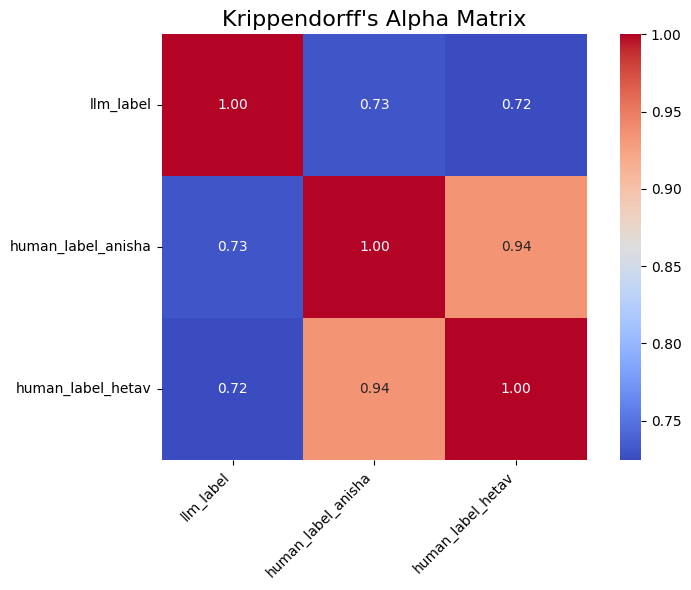

In [77]:
import pandas as pd
import krippendorff
import numpy as np

# Assuming df_majority_human is already loaded
llm_label = df_margin_combined['label']
llm_second_best_label = df_margin_combined['second_best_label']
human_label_anisha = df_margin_combined['human_label_anisha']
human_label_hetav = df_margin_combined['human_label_hetav']

# Prepare all label sets
labels_dict = {
    'llm_label': llm_label,
    # 'llm_second_best_label': llm_second_best_label,
    'human_label_anisha': human_label_anisha,
    'human_label_hetav': human_label_hetav
}

# Function to compute Krippendorff's alpha between two annotators
def compute_alpha(labels1, labels2):
    # Stack the two label lists together
    data = np.array([labels1.tolist(), labels2.tolist()])
    return krippendorff.alpha(reliability_data=data)

# Create empty DataFrame to store results
raters = list(labels_dict.keys())
alpha_matrix = pd.DataFrame(index=raters, columns=raters)

# Fill the 3x3 matrix
for rater1 in raters:
    for rater2 in raters:
        alpha_value = compute_alpha(labels_dict[rater1], labels_dict[rater2])
        alpha_matrix.loc[rater1, rater2] = round(alpha_value, 4)
        
import matplotlib.pyplot as plt
import seaborn as sns

# Convert matrix values to numeric (important, because right now they are strings)
alpha_matrix_numeric = alpha_matrix.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(alpha_matrix_numeric, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Krippendorff's Alpha Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

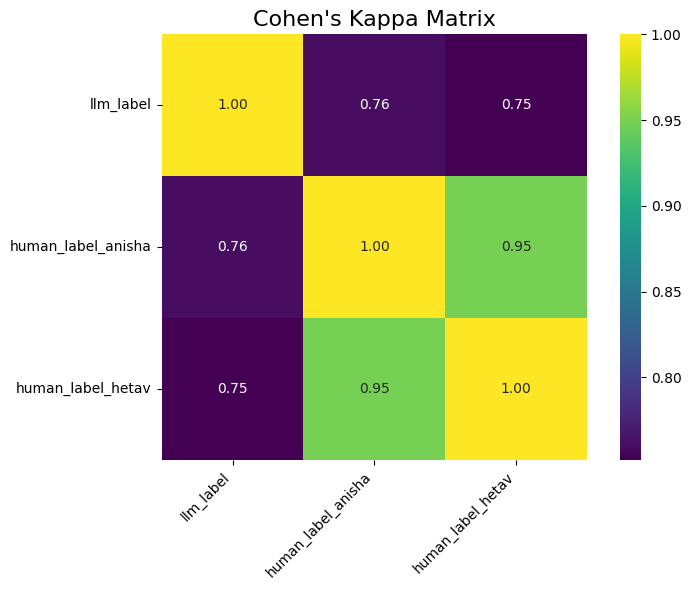

In [78]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import numpy as np

# Assuming df_majority_human is already loaded
llm_label = df_margin_combined['label']
llm_second_best_label = df_margin_combined['second_best_label']
human_label_anisha = df_margin_combined['human_label_anisha']
human_label_hetav = df_margin_combined['human_label_hetav']

# Prepare all label sets
labels_dict = {
    'llm_label': llm_label,
    # 'llm_second_best_label': llm_second_best_label,
    'human_label_anisha': human_label_anisha,
    'human_label_hetav': human_label_hetav
}

# Function to compute Cohen's kappa between two annotators
def compute_kappa(labels1, labels2):
    return cohen_kappa_score(labels1, labels2)

# Create empty DataFrame to store results
raters = list(labels_dict.keys())
kappa_matrix = pd.DataFrame(index=raters, columns=raters)

# Fill the 3x3 matrix
for rater1 in raters:
    for rater2 in raters:
        if rater1 == rater2:
            kappa_value = 1.0  # Agreement with self is perfect
        else:
            kappa_value = compute_kappa(labels_dict[rater1], labels_dict[rater2])
        kappa_matrix.loc[rater1, rater2] = round(kappa_value, 4)

import matplotlib.pyplot as plt
import seaborn as sns

# Convert matrix values to numeric (they are probably strings after rounding)
kappa_matrix_numeric = kappa_matrix.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(kappa_matrix_numeric, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)

plt.title("Cohen's Kappa Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
# number of disagreements  between human annotators only
compare = [df_margin_combined.iloc[i]['human_label_anisha'] == df_margin_combined.iloc[i]['human_label_hetav'] for i in range(len(df_margin_combined))]

# disagreements
disagreements = [i for i in range(len(compare)) if compare[i] == False]
len(disagreements)


36

# Make test, train, and val sets

In [1]:
import pandas as pd

In [2]:
df_annotate_first = pd.read_csv('/home/sd3528/hetav-2/data/2700_comments_final_labeled.csv')

In [3]:
df_annotate_first['label'].value_counts()

label
6    1065
5     715
7     266
3     231
1     231
4     141
2      58
Name: count, dtype: int64

In [4]:
df_annotate_first['label'] = df_annotate_first['label'].apply(lambda x: int(x) - 1)
df_annotate_first['label'].value_counts()

label
5    1065
4     715
6     266
2     231
0     231
3     141
1      58
Name: count, dtype: int64

In [5]:
df_majority_sampling = pd.read_csv('/home/sd3528/hetav-2/data/top_100_majority_human_annotate_corrected.csv')
df_majority_sampling

,id,text,human_label
0,0933ba35-b3ee-4dd3-8309-c4bd0d128666,Em clear ga cheppav :party_popper:nice :thumbs...,6
1,a75b4d0d-a089-478f-a615-432109ffafaa,Paisa is sab hai ... Our system is totally cor...,5
2,461c8dd7-449f-4789-a3a2-67a3efd72074,We want justice.....the value of their lives z...,4
3,267daf2c-7cde-4b0d-8688-b8fa1d0bed55,I lived in ahmednagar.. And i found that u nee...,2
4,67e905d8-2823-4241-b1fd-7b88e677a4a9,"You always covered the news really well ,comm...",6
...,...,...,...
695,bb3731f5-977b-43e8-9cc4-39c94e61c6a4,I am from Indore and I don’t hesitate to accep...,2
696,27694197-80f1-4cf4-8f9d-de4cc336f789,Indian judiciary system fucked up....I persona...,1
697,80f9e4ea-773d-46be-9779-6f9699b5b1d0,Money is everything in India. You have money a...,3
698,5bc925eb-3ebb-4081-ab1e-e7ba41937fb9,Nothing changed in 10 years .people are being ...,2


In [6]:
df_majority_sampling['human_label'].value_counts()

human_label
5    133
6    123
1    106
3    100
7     98
4     93
2     47
Name: count, dtype: int64

In [7]:
df_majority_sampling['label'] = df_majority_sampling['human_label'].apply(lambda x: int(x) - 1)

In [8]:
df_majority_sampling['label'].value_counts()

label
4    133
5    123
0    106
2    100
6     98
3     93
1     47
Name: count, dtype: int64

In [9]:
df_margin_sampling = pd.read_csv('/home/sd3528/hetav-2/data/top_20_margin_sample_final.csv')
df_margin_sampling

,id,text,human_label
0,7bdabb73-54e7-43e0-b253-b1007f1735c5,"For your knowledge spreading talent, and of ex...",6
1,a62508d3-1ed7-40ff-b250-50a07a726c57,Law is only for common people not for rich people,3
2,b424ecb8-ba4a-4c48-8e37-5f2fa74e59be,This case shocks India,5
3,4f418a80-acb5-4a50-bfc8-77e5c0c63ed0,Walking on road at 2 AM is inviting Yamraj.Use...,5
4,f8949a05-5325-4bd4-893f-671e4ef0ba44,"18 years, too much!!! Maximum age should be no...",1
...,...,...,...
821,1bcffd11-8bf6-4455-a4e2-180ed3fd8aef,"Justice for anish,aswani :crying_face::crying_...",4
822,ad2fe3be-da3e-492c-8742-17713d9ab792,Jarman cokros,6
823,ce890ecc-db89-42e3-9e90-1afe915abf17,How about salman khan case in your era.. and a...,7
824,74e98fe6-0f79-4b28-bfbb-160fb5cfdda0,Want justice :confounded_face::exploding_head:,4


In [10]:
df_margin_sampling['human_label'].value_counts()

human_label
6    171
5    162
3    129
4    114
7     96
2     80
1     74
Name: count, dtype: int64

In [11]:
df_margin_sampling['label'] = df_margin_sampling['human_label'].apply(lambda x: int(x) - 1)
df_margin_sampling['label'].value_counts()

label
5    171
4    162
2    129
3    114
6     96
1     80
0     74
Name: count, dtype: int64

In [12]:
df_total = pd.concat([df_annotate_first, df_majority_sampling, df_margin_sampling], ignore_index=True)
df_total['label'].value_counts()

label
5    1359
4    1010
2     460
6     460
0     411
3     348
1     185
Name: count, dtype: int64

In [13]:
# take 30 from each class
df_eval = pd.DataFrame()
for i in range(7):
    df_temp = df_total[df_total['label'] == i].sample(n=30, random_state=42)
    df_eval = pd.concat([df_eval, df_temp], ignore_index=True)
df_eval['label'].value_counts()

label
0    30
1    30
2    30
3    30
4    30
5    30
6    30
Name: count, dtype: int64

In [14]:
final_dataset = []
count = 0
test_texts = df_eval['text'].tolist()
for d in df_total.to_dict(orient='records'):
  if d['text'] in test_texts:
    count += 1
  else:
    final_dataset.append({
      'text':d['text'],
      'label':d['label']
    })

In [15]:
len(final_dataset)

4021

In [16]:
df_majority_dataset = pd.DataFrame(final_dataset)
df_majority_dataset = df_majority_dataset.sample(frac=1)
df_majority_dataset

,text,label
3943,power of money :money-mouth_face::money-mouth_...,2
1504,Deepest condolences totheir families.,3
3879,Same case happened here in Pakistan too . Kuch...,6
2799,U havent ever read about most recent accident ...,6
2564,What's the point for having a pedestrian lane ...,4
...,...,...
3012,This Man deserves Justice,3
1253,No justice for those who lose there life :loud...,3
4000,Justice delayed is justice denied..these cases...,4
1204,Right he pune case me victim girl boy should g...,4


In [17]:
df_majority_train = df_majority_dataset[:round(0.9*len(df_majority_dataset))]
df_majority_test = df_majority_dataset[round(0.9*len(df_majority_dataset)):]

In [20]:
len(df_majority_train), len(df_majority_test)

(3619, 402)

In [18]:
df_majority_train.to_csv('/home/sd3528/hetav-2/data/margin/train_minority_sampling.csv')
df_majority_test.to_csv('/home/sd3528/hetav-2/data/margin/valid_minority_sampling.csv')

In [19]:
df_eval.to_csv('/home/sd3528/hetav-2/data/eval_30_each.csv')

## form labels

In [1]:
import pandas as pd
df_majority_train = pd.read_csv('/home/sd3528/hetav-2/data/margin/train_minority_sampling.csv')
df_majority_test= pd.read_csv('/home/sd3528/hetav-2/data/margin/valid_minority_sampling.csv')

In [ ]:
def label_to_text(label):
    label = int(label) + 1
    if label == 1 or label == 1.0:
        return "Judicial Accountability and Policy Demands"
    elif label == 2 or label == 2.0:
        return "Public Safety"
    elif label == 3 or label == 3.0:
        return "Socioeconomic Privilege"
    elif label == 4 or label == 4.0:
        return "Victim Sympathy"
    elif label == 5 or label == 5.0:
        return "Anger or Outrage"
    elif label == 6 or label == 6.0:
        return "Irrelevant/General Comments"
    elif label == 7 or label == 7.0:
        return "Views on Similar Cases in the Past"
    else:
        return "Unknown or might need to be fixed"
      


In [3]:
df_majority_train['Topic_Label'] = df_majority_train['label'].apply(label_to_text)
df_majority_test['Topic_Label'] = df_majority_test['label'].apply(label_to_text)

In [4]:
df_majority_train['Topic_Label'].value_counts()

Topic_Label
Irrelevant/General Comments                   1194
Anger or Outrage                               875
Views on Similar Cases in the Past             391
Socioeconomic Privilege                        383
Judicial Accountability and Policy Demands     348
Victim Sympathy                                285
Public Safety                                  143
Name: count, dtype: int64

In [5]:
df_majority_train.to_csv('/home/sd3528/hetav-2/data/margin/train_minority_sampling_w_topic.csv')
df_majority_test.to_csv('/home/sd3528/hetav-2/data/margin/valid_minority_sampling_w_topic.csv')

In [9]:
unique_labels = df_majority_train['Topic_Label'].unique().tolist()

In [10]:
unique_labels

['Socioeconomic Privilege',
 'Victim Sympathy',
 'Views on Similar Cases in the Past',
 'Anger or Outrage',
 'Irrelevant/General Comments',
 'Public Safety',
 'Judicial Accountability and Policy Demands']

In [ ]:
label_descriptions = [    
    "Judicial Accountability and Policy Demands",            
    "Public Safety",                                         
    "Socioeconomic Privilege",                               
    "Victim Sympathy",                                       
    "Anger or Outrage",                                      
    "Irrelevant/General Comments",                           
    "Views on Similar Cases in the Past"                     
]

# Test anisha and hetav on what they agree, minority 

In [1]:
import pandas as pd
import json


In [2]:
df = pd.read_csv('/home/sd3528/hetav-2/data/margin/margin_inference.csv')

In [4]:
df['pred'] == df['label']

0       True
1       True
2       True
3      False
4      False
       ...  
397     True
398     True
399     True
400    False
401    False
Length: 402, dtype: bool